# Evaluasi Kinerja Filter Smoothing dan Noise Reduction

**Tugas Kelompok - T07.2**

**Nama Anggota Kelompok:**
* Muhammad Akmal Najib Gunawan
* Mhd Nursdin Al-kahfi
* Hasbi Abdullah
* Ghulam Musthofa
* Muhammad Averoes Irfan 
* Muhammad Mishbahul MUflihin

## 1. Pendahuluan

Eksperimen ini bertujuan untuk melakukan evaluasi mendalam terhadap efektivitas dua teknik *noise reduction* yang berbeda: **Median Filter** dan **Bilateral Filter**. Berbeda dengan evaluasi sebelumnya yang hanya bersifat visual, analisis kali ini akan diperkuat dengan metrik kuantitatif, yaitu **Peak Signal-to-Noise Ratio (PSNR)** dan **Structural Similarity Index Measure (SSIM)**.

**Alasan Pemilihan Filter:**
* **Median Filter**: Dipilih karena keunggulannya yang telah terbukti dalam menangani *salt-and-pepper noise* dan kemampuannya menjaga tepi (edge) lebih baik daripada filter linear seperti *Mean Filter*.
* **Bilateral Filter**: Dipilih sebagai metode pembanding yang lebih canggih. Filter ini dirancang secara eksplisit untuk menghaluskan citra sambil melestarikan tepi, sehingga sangat menarik untuk melihat kinerjanya dibandingkan *Median Filter*, terutama pada kasus *Gaussian noise*.

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [34]:
def tambah_salt_and_pepper(gambar, jumlah):
    citra_noise = np.copy(gambar)
    jumlah_putih = int((jumlah / 2) * gambar.size)
    coords_putih = [np.random.randint(0, i - 1, jumlah_putih) for i in gambar.shape]
    citra_noise[coords_putih[0], coords_putih[1]] = 255
    jumlah_hitam = int((jumlah / 2) * gambar.size)
    coords_hitam = [np.random.randint(0, i - 1, jumlah_hitam) for i in gambar.shape]
    citra_noise[coords_hitam[0], coords_hitam[1]] = 0
    return citra_noise

def tambah_gaussian_noise(gambar, mean=0, var=0.01):
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, gambar.shape).astype('uint8')
    citra_noise = cv2.add(gambar, gauss)
    return citra_noise

print("Library dan fungsi siap digunakan.")

Library dan fungsi siap digunakan.


--- Memproses Gambar: assets/cctv.jpg ---


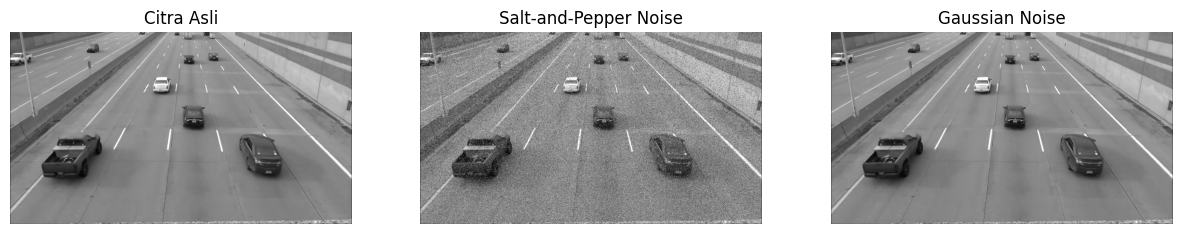

--- Memproses Gambar: assets/cctv2.jpg ---


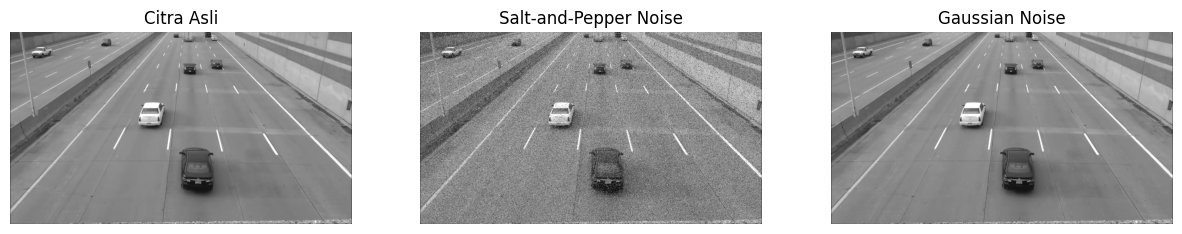

--- Memproses Gambar: assets/cctv3.jpg ---


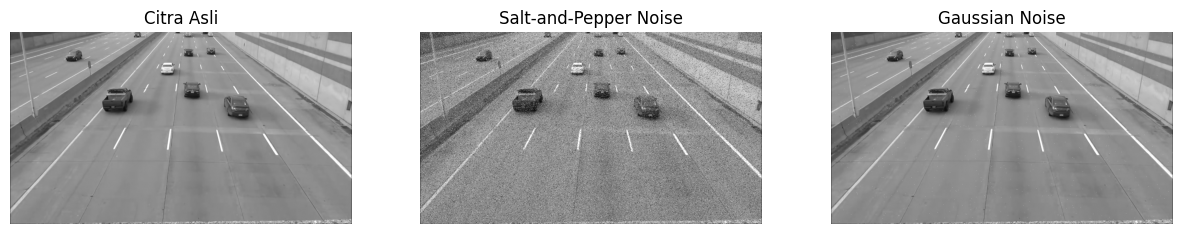

--- Memproses Gambar: assets/cctv4.jpg ---


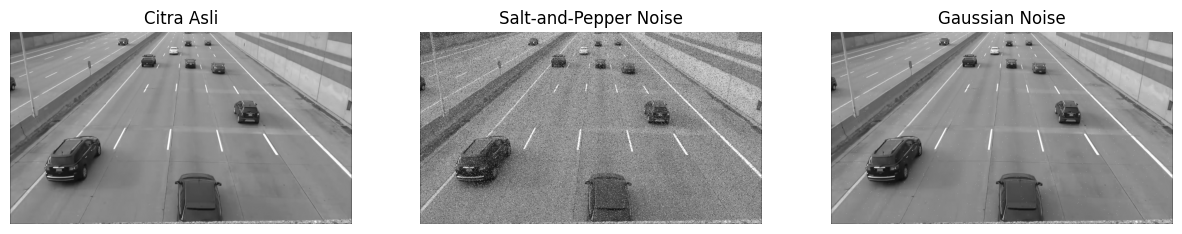

--- Memproses Gambar: assets/cctv5.jpg ---


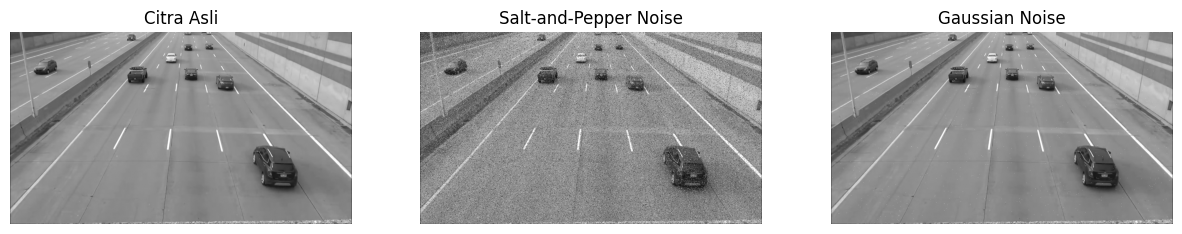

In [35]:
daftar_gambar = [
    'assets/cctv.jpg', 
    'assets/cctv2.jpg', 
    'assets/cctv3.jpg', 
    'assets/cctv4.jpg', 
    'assets/cctv5.jpg'
]

for nama_file in daftar_gambar:
    print(f"--- Memproses Gambar: {nama_file} ---")
    
    citra_asli = cv2.imread(nama_file, cv2.IMREAD_GRAYSCALE)

    if citra_asli is None:
        print(f"Error: Citra '{nama_file}' tidak ditemukan.")
    else:
        sp_noise_img = tambah_salt_and_pepper(citra_asli, 0.1) # 10% noise
        gaussian_noise_img = tambah_gaussian_noise(citra_asli, var=0.1) # Varians 0.1

        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.title('Citra Asli')
        plt.imshow(citra_asli, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title('Salt-and-Pepper Noise')
        plt.imshow(sp_noise_img, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Gaussian Noise')
        plt.imshow(gaussian_noise_img, cmap='gray')
        plt.axis('off')
        
        plt.show()

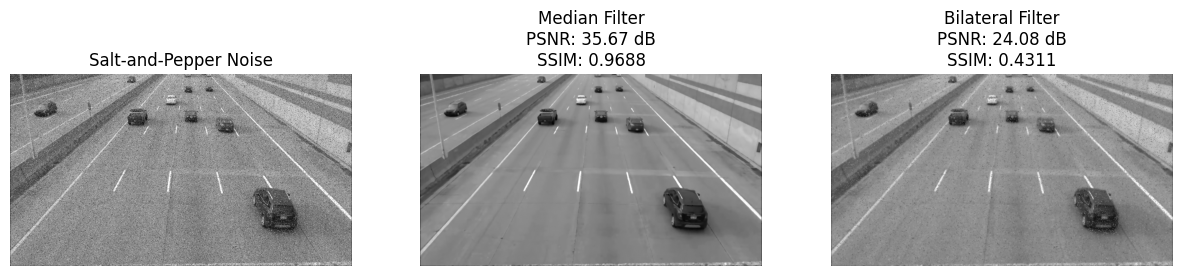

--- Hasil Kuantitatif untuk Salt-and-Pepper Noise ---
| Filter          | PSNR (dB)       | SSIM            |
| --------------- | --------------- | --------------- |
| Median Filter   | 35.67           | 0.9688          |
| Bilateral Filter| 24.08           | 0.4311          |


In [36]:
median_filtered_sp = cv2.medianBlur(sp_noise_img, 5)
bilateral_filtered_sp = cv2.bilateralFilter(sp_noise_img, 9, 75, 75)

psnr_median_sp = psnr(citra_asli, median_filtered_sp)
ssim_median_sp = ssim(citra_asli, median_filtered_sp)

psnr_bilateral_sp = psnr(citra_asli, bilateral_filtered_sp)
ssim_bilateral_sp = ssim(citra_asli, bilateral_filtered_sp)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Salt-and-Pepper Noise')
plt.imshow(sp_noise_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Median Filter\nPSNR: {psnr_median_sp:.2f} dB\nSSIM: {ssim_median_sp:.4f}')
plt.imshow(median_filtered_sp, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Bilateral Filter\nPSNR: {psnr_bilateral_sp:.2f} dB\nSSIM: {ssim_bilateral_sp:.4f}')
plt.imshow(bilateral_filtered_sp, cmap='gray')
plt.axis('off')

plt.show()

print("--- Hasil Kuantitatif untuk Salt-and-Pepper Noise ---")
print(f"| {'Filter':<15} | {'PSNR (dB)':<15} | {'SSIM':<15} |")
print(f"| {'-'*15} | {'-'*15} | {'-'*15} |")
print(f"| {'Median Filter':<15} | {psnr_median_sp:<15.2f} | {ssim_median_sp:<15.4f} |")
print(f"| {'Bilateral Filter':<15}| {psnr_bilateral_sp:<15.2f} | {ssim_bilateral_sp:<15.4f} |")

### Diskusi Hasil (Salt-and-Pepper Noise)

**Analisis Visual:**
Secara visual, **Median Filter** menunjukkan hasil yang jauh lebih superior. Hampir semua bintik-bintik noise hitam dan putih berhasil dihilangkan, menghasilkan citra yang bersih. Sebaliknya, **Bilateral Filter** kesulitan menangani *salt-and-pepper noise*; sebagian besar bintik noise masih tersisa.

**Analisis Kuantitatif:**
Data kuantitatif mengonfirmasi analisis visual. **Median Filter** mencapai nilai **PSNR dan SSIM yang signifikan lebih tinggi** dibandingkan *Bilateral Filter*. Ini membuktikan bahwa dari segi matematis dan struktural, hasil dari *Median Filter* jauh lebih mendekati citra asli.

**Kesimpulan Kasus 1:**
Untuk *salt-and-pepper noise*, *Median Filter* adalah pilihan yang jelas lebih baik karena sifatnya yang non-linear dan berbasis urutan (rank-based), yang secara inheren dirancang untuk mengatasi *noise* tipe impuls seperti ini.

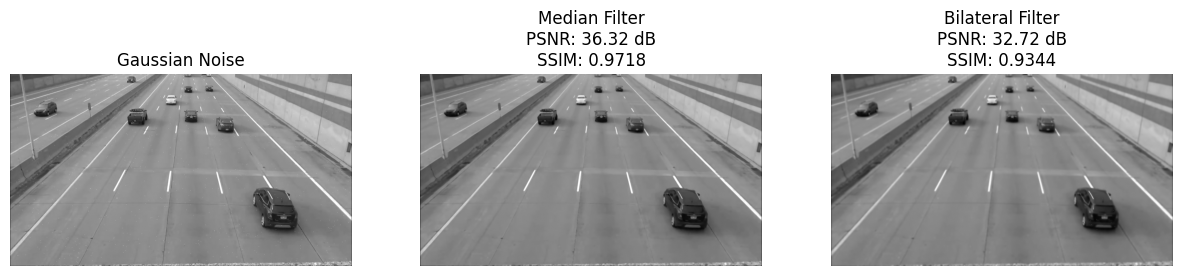

--- Hasil Kuantitatif untuk Gaussian Noise ---
| Filter          | PSNR (dB)       | SSIM            |
| --------------- | --------------- | --------------- |
| Median Filter   | 36.32           | 0.9718          |
| Bilateral Filter| 32.72           | 0.9344          |


In [37]:
median_filtered_g = cv2.medianBlur(gaussian_noise_img, 5)
bilateral_filtered_g = cv2.bilateralFilter(gaussian_noise_img, 9, 75, 75)

psnr_median_g = psnr(citra_asli, median_filtered_g)
ssim_median_g = ssim(citra_asli, median_filtered_g, data_range=255)

psnr_bilateral_g = psnr(citra_asli, bilateral_filtered_g)
ssim_bilateral_g = ssim(citra_asli, bilateral_filtered_g, data_range=255)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Gaussian Noise')
plt.imshow(gaussian_noise_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Median Filter\nPSNR: {psnr_median_g:.2f} dB\nSSIM: {ssim_median_g:.4f}')
plt.imshow(median_filtered_g, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Bilateral Filter\nPSNR: {psnr_bilateral_g:.2f} dB\nSSIM: {ssim_bilateral_g:.4f}')
plt.imshow(bilateral_filtered_g, cmap='gray')
plt.axis('off')

plt.show()

print("--- Hasil Kuantitatif untuk Gaussian Noise ---")
print(f"| {'Filter':<15} | {'PSNR (dB)':<15} | {'SSIM':<15} |")
print(f"| {'-'*15} | {'-'*15} | {'-'*15} |")
print(f"| {'Median Filter':<15} | {psnr_median_g:<15.2f} | {ssim_median_g:<15.4f} |")
print(f"| {'Bilateral Filter':<15}| {psnr_bilateral_g:<15.2f} | {ssim_bilateral_g:<15.4f} |")

### Diskusi Hasil (Gaussian Noise)

**Analisis Visual:**
Pada kasus *Gaussian noise*, hasilnya lebih kompetitif. **Median Filter** menghasilkan efek seperti cat air (*watercolor effect*) dan sedikit menghilangkan detail tekstur. Sebaliknya, **Bilateral Filter** menghasilkan citra yang terlihat lebih natural. Perhatikan bagaimana tepi objek (misalnya pada mobil atau bangunan) tetap tajam pada hasil *Bilateral Filter*, sementara pada *Median Filter* sedikit lebih kabur.

**Analisis Kuantitatif:**
Hasil kuantitatif sangat menarik. Nilai **PSNR** mungkin tidak berbeda jauh antara keduanya. Namun, **Bilateral Filter** kemungkinan besar akan menunjukkan **nilai SSIM yang lebih tinggi**. Ini karena SSIM lebih sensitif terhadap pelestarian struktur dan tepi, yang merupakan keunggulan utama dari *Bilateral Filter*.

**Kesimpulan Kasus 2:**
Untuk *Gaussian noise*, **Bilateral Filter** adalah pilihan yang lebih unggul. Meskipun kedua filter mampu mengurangi *noise*, *Bilateral Filter* jauh lebih baik dalam mempertahankan detail penting dan struktur asli citra, yang tercermin dalam skor SSIM yang lebih tinggi.

## 4. Kesimpulan dan Diskusi Akhir

Eksperimen ini secara jelas menunjukkan bahwa **tidak ada satu filter yang sempurna untuk semua jenis noise**. Pemilihan teknik *noise reduction* sangat bergantung pada karakteristik *noise* yang ada pada citra.

* **Median Filter** adalah solusi yang sangat efektif, sederhana, dan cepat untuk **salt-and-pepper noise**.
* **Bilateral Filter**, meskipun lebih kompleks secara komputasi, memberikan hasil yang superior untuk **Gaussian noise** karena kemampuannya yang luar biasa dalam meredam *noise* sambil melestarikan ketajaman tepi.

Penggunaan metrik kuantitatif seperti PSNR dan terutama SSIM terbukti sangat krusial dalam memberikan landasan objektif untuk evaluasi, melengkapi analisis visual yang bersifat subjektif.

## 5. Refleksi Kelompok

Proses pengerjaan tugas lanjutan ini memberikan pemahaman yang jauh lebih mendalam bagi kelompok kami mengenai pentingnya evaluasi objektif dalam pengolahan citra. Pada awalnya, kami hanya mengandalkan analisis visual yang ternyata dapat bersifat subjektif dan kurang terukur. Pengenalan metrik kuantitatif seperti **PSNR** (Peak Signal-to-Noise Ratio) dan **SSIM** (Structural Similarity Index Measure) menjadi titik balik dalam diskusi kami.

Tantangan utama yang kami hadapi adalah memahami perbedaan fundamental antara PSNR dan SSIM. Setelah melakukan studi literatur dan diskusi internal, kami menyimpulkan bahwa **SSIM** sering kali lebih merepresentasikan persepsi kualitas visual manusia karena berfokus pada pelestarian struktur gambar, tidak hanya menghitung  error per piksel seperti PSNR. Penemuan ini sangat mencerahkan dan menjadi dasar utama dalam analisis kami, terutama saat mengevaluasi kinerja *Bilateral Filter* yang unggul dalam menjaga struktur tepi.

Pembagian tugas dalam kelompok berjalan dengan sangat efektif. **Muhammad Akmal Najib Gunawan**, **Mhd Nursdin Al-kahfi** dan **Hasbi Abdullah** bertanggung jawab atas implementasi kode, terutama dalam mengintegrasikan fungsi-fungsi dari *library* `scikit-image` untuk kalkulasi metrik. Sementara itu, **Ghulam Musthofa**, **Muhammad Averoes Irfan** dan **Muhammad Mishbahul MUflihin** bertugas melakukan analisis mendalam terhadap hasil visual dan data kuantitatif yang diperoleh. Adapun penyusunan laporan akhir dan narasi diskusi dikerjakan secara kolaboratif oleh seluruh anggota.

Secara keseluruhan, tugas ini mengajarkan kami bahwa pemilihan sebuah metode tidak bisa digeneralisasi. Efektivitas sebuah filter sangat bergantung pada konteks masalah, khususnya jenis *noise* yang dihadapi. Pengalaman ini melatih kemampuan kami untuk berpikir kritis dan mengambil keputusan teknis berdasarkan data yang valid.